In [311]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns

# HYPERPARAMETER TUNNING

## No layer

In [312]:
path = '/home/mr1142/Documents/Data/models/neumonia/ht/train_max_completo.csv'
df = pd.read_csv(path)

In [313]:
df.sort_values('val_auc')

,name,modelo,fine,batch,lr,mask,pixels,loss,binary_accuracy,precision,auc,val_loss,val_binary_accuracy,val_precision,val_auc
3,ht,EffNet3,0.866730,8,0.000822,True,512,1.424052,0.666668,0.454545,0.507735,1.129564,0.666667,0.000000,0.503333
5,ht,EffNet3,0.866730,8,0.000822,True,512,1.431295,0.666668,0.500000,0.510612,1.217522,0.666667,0.325000,0.506250
14,ht,EffNet3,0.672399,8,0.000916,True,512,1.512651,0.666668,0.344704,0.507499,1.135023,0.666667,0.000000,0.515326
46,ht,EffNet3,0.985181,8,0.000220,True,512,2.907386,0.643750,0.354000,0.508456,1.136167,0.666667,0.000000,0.516240
45,ht,EffNet3,0.985181,8,0.000220,True,512,2.588400,0.665834,0.385965,0.522162,1.338920,0.666667,0.355000,0.516667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,ht,EffNet3,0.161930,8,0.000945,False,512,1.188100,0.921112,0.885847,0.974112,1.446090,0.899445,0.858120,0.963258
40,ht,Xception,0.648471,8,0.000381,False,512,0.745042,0.979305,0.969545,0.996634,0.623877,0.908333,0.863105,0.963380
22,ht,Xception,0.236592,8,0.000157,False,512,0.676277,0.986667,0.980801,0.998414,0.497062,0.917778,0.880471,0.965298
30,ht,Xception,0.456814,8,0.000131,False,512,0.689983,0.994722,0.992083,0.999222,0.553048,0.906111,0.861953,0.965526


## Layer

In [314]:
path = '/home/mr1142/Documents/Data/models/neumonia/ht/train_max_completo_layer.csv'
df = pd.read_csv(path)

In [315]:
df.sort_values('val_auc')

,name,modelo,fine,batch,lr,mask,pixels,loss,binary_accuracy,precision,auc,val_loss,val_binary_accuracy,val_precision,val_auc
17,ht,EffNet3,0.426253,8,0.000858,True,512,1.704176,0.666946,0.571429,0.512481,1.112323,0.666667,0.000000,0.505806
26,ht,EffNet3,0.532704,8,0.000706,True,512,1.447723,0.666112,0.375000,0.504375,1.112151,0.666667,0.000000,0.523333
15,ht,EffNet3,0.426253,8,0.000858,True,512,1.876307,0.666668,0.444444,0.515502,1.603424,0.666667,0.348333,0.547733
13,ht,EffNet3,0.219468,8,0.001004,False,512,1.857881,0.736805,0.635750,0.817274,1.905287,0.781111,0.964497,0.856656
37,ht,IncResNet,0.289632,8,0.000976,True,512,1.760661,0.780278,0.693839,0.848991,1.225466,0.810556,0.730018,0.896769
12,ht,EffNet3,0.219468,8,0.001004,False,512,1.591575,0.775972,0.698237,0.867901,1.099810,0.816111,0.766467,0.900468
25,ht,EffNet3,0.532704,8,0.000706,True,512,1.726707,0.844028,0.769979,0.921049,1.128325,0.849444,0.877358,0.901776
4,ht,EffNet3,0.444351,8,0.000775,False,512,1.595438,0.817222,0.751391,0.887337,1.068539,0.836667,0.867021,0.902578
31,ht,IncResNet,0.508144,8,0.000733,True,512,1.768295,0.882361,0.831413,0.938109,4.078215,0.845000,0.771574,0.909673
16,ht,EffNet3,0.426253,8,0.000858,True,512,1.541356,0.865973,0.801851,0.938064,1.234581,0.852778,0.803279,0.917783


## PREDICTION

## No layer

In [316]:
path = '/home/mr1142/Documents/Data/models/neumonia/ht/prediction_validation_metrics_completo.csv'
df = pd.read_csv(path)

In [317]:
df['auc_mean'] = (df.auc_0 + df.auc_1 + df.auc_2)/3
df['f1_score_mean'] = (df.f1_score_0 + df.f1_score_1 + df.f1_score_2)/3

In [318]:
df.columns

Index(['backbone', 'frozen_prop', 'batch', 'lr', 'mask', 'pix', 'auc_0',
       'younden_0', 'pr_max_0', 'pr_cut_0', 'auc_1', 'younden_1', 'pr_max_1',
       'pr_cut_1', 'auc_2', 'younden_2', 'pr_max_2', 'pr_cut_2', 'f1_score_0',
       'precision_score_0', 'recall_score_0', 'accuracy_score_0', 'f1_score_1',
       'precision_score_1', 'recall_score_1', 'accuracy_score_1', 'f1_score_2',
       'precision_score_2', 'recall_score_2', 'accuracy_score_2',
       'f1_score[0, 1]', 'precision_score[0, 1]', 'recall_score[0, 1]',
       'accuracy_score[0, 1]', 'f1_score[0, 2]', 'precision_score[0, 2]',
       'recall_score[0, 2]', 'accuracy_score[0, 2]', 'f1_score[1, 2]',
       'precision_score[1, 2]', 'recall_score[1, 2]', 'accuracy_score[1, 2]',
       'auc_mean', 'f1_score_mean'],
      dtype='object')

In [319]:
print(np.mean(df.auc_mean))
np.mean(df.f1_score_mean)

0.9120443002283107


0.8485145866758425

In [320]:
df.sort_values('f1_score_mean')

,backbone,frozen_prop,batch,lr,mask,pix,auc_0,younden_0,pr_max_0,pr_cut_0,...,"f1_score[0, 2]","precision_score[0, 2]","recall_score[0, 2]","accuracy_score[0, 2]","f1_score[1, 2]","precision_score[1, 2]","recall_score[1, 2]","accuracy_score[1, 2]",auc_mean,f1_score_mean
6,EffNet3,0.922894,8,0.000364,False,512,0.145331,1.334598,0.334591,0.334597,...,0.166667,0.111111,0.333333,0.333333,0.166667,0.111111,0.333333,0.333333,0.406957,0.411111
45,EffNet3,0.985181,8,0.000220,True,512,0.634926,0.318680,0.318658,0.318754,...,0.166667,0.111111,0.333333,0.333333,0.166667,0.111111,0.333333,0.333333,0.538509,0.411111
46,EffNet3,0.985181,8,0.000220,True,512,0.705473,0.305415,0.305250,0.305640,...,0.166667,0.111111,0.333333,0.333333,0.166667,0.111111,0.333333,0.333333,0.600479,0.411111
14,EffNet3,0.672399,8,0.000916,True,512,0.572670,0.314079,0.314010,0.314099,...,0.166667,0.111111,0.333333,0.333333,0.166667,0.111111,0.333333,0.333333,0.513989,0.411111
3,EffNet3,0.866730,8,0.000822,True,512,0.651215,0.349779,0.349753,0.349808,...,0.533333,0.444444,0.666667,0.666667,0.166667,0.111111,0.333333,0.333333,0.614622,0.411111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,Xception,0.236592,8,0.000157,False,512,0.996946,0.310951,0.516909,0.495231,...,0.697033,0.839338,0.694333,0.694333,0.928441,0.934265,0.927333,0.927333,0.989595,0.955234
21,Xception,0.236592,8,0.000157,False,512,0.998636,0.522779,0.760825,0.810023,...,0.747854,0.852718,0.742667,0.742667,0.950511,0.951320,0.951000,0.951000,0.991037,0.955502
22,Xception,0.236592,8,0.000157,False,512,0.997804,0.314728,0.314728,0.481942,...,0.742778,0.850068,0.737667,0.737667,0.960278,0.960252,0.960333,0.960333,0.990009,0.963564
30,Xception,0.456814,8,0.000131,False,512,0.998058,0.306108,0.540606,0.514805,...,0.720691,0.846847,0.716667,0.716667,0.958854,0.959377,0.958667,0.958667,0.992898,0.964639


In [321]:
no_layer = df

## Layer

In [322]:
path = '/home/mr1142/Documents/Data/models/neumonia/ht/prediction_validation_metrics_completo_layer.csv'
df = pd.read_csv(path)

In [323]:
df['auc_mean'] = (df.auc_0 + df.auc_1 + df.auc_2)/3
df['f1_score_mean'] = (df.f1_score_0 + df.f1_score_1 + df.f1_score_2)/3

In [324]:
df.columns

Index(['backbone', 'frozen_prop', 'batch', 'lr', 'mask', 'pix', 'auc_0',
       'younden_0', 'pr_max_0', 'pr_cut_0', 'auc_1', 'younden_1', 'pr_max_1',
       'pr_cut_1', 'auc_2', 'younden_2', 'pr_max_2', 'pr_cut_2', 'f1_score_0',
       'precision_score_0', 'recall_score_0', 'accuracy_score_0', 'f1_score_1',
       'precision_score_1', 'recall_score_1', 'accuracy_score_1', 'f1_score_2',
       'precision_score_2', 'recall_score_2', 'accuracy_score_2',
       'f1_score[0, 1]', 'precision_score[0, 1]', 'recall_score[0, 1]',
       'accuracy_score[0, 1]', 'f1_score[0, 2]', 'precision_score[0, 2]',
       'recall_score[0, 2]', 'accuracy_score[0, 2]', 'f1_score[1, 2]',
       'precision_score[1, 2]', 'recall_score[1, 2]', 'accuracy_score[1, 2]',
       'auc_mean', 'f1_score_mean'],
      dtype='object')

In [325]:
print(np.mean(df.auc_mean))
np.mean(df.f1_score_mean)

0.9348973563829788


0.8731203428331169

In [326]:
df.sort_values('f1_score_mean')

,backbone,frozen_prop,batch,lr,mask,pix,auc_0,younden_0,pr_max_0,pr_cut_0,...,"f1_score[0, 2]","precision_score[0, 2]","recall_score[0, 2]","accuracy_score[0, 2]","f1_score[1, 2]","precision_score[1, 2]","recall_score[1, 2]","accuracy_score[1, 2]",auc_mean,f1_score_mean
17,EffNet3,0.426253,8,0.000858,True,512,0.671289,0.351637,0.351487,0.351655,...,0.533333,0.444444,0.666667,0.666667,0.533333,0.444444,0.666667,0.666667,0.552324,0.411111
26,EffNet3,0.532704,8,0.000706,True,512,0.638800,0.345715,0.345709,0.000000,...,0.533333,0.444444,0.666667,0.666667,0.533333,0.444444,0.666667,0.666667,0.558137,0.411111
15,EffNet3,0.426253,8,0.000858,True,512,0.693496,0.360102,0.360024,0.360106,...,0.533333,0.444444,0.666667,0.666667,0.533333,0.444444,0.666667,0.666667,0.619851,0.411111
13,EffNet3,0.219468,8,0.001004,False,512,0.979543,0.710886,0.786990,0.866264,...,0.715644,0.793411,0.708333,0.708333,0.638713,0.744332,0.632667,0.632667,0.832408,0.726109
4,EffNet3,0.444351,8,0.000775,False,512,0.984207,0.639389,0.752988,0.729431,...,0.702431,0.811234,0.697000,0.697000,0.741307,0.827948,0.735000,0.735000,0.904605,0.802138
12,EffNet3,0.219468,8,0.001004,False,512,0.976270,0.563580,0.662605,0.656522,...,0.686972,0.810202,0.682667,0.682667,0.783829,0.783156,0.784667,0.784667,0.875332,0.816487
37,IncResNet,0.289632,8,0.000976,True,512,0.968395,0.351496,0.404897,0.445201,...,0.755211,0.837844,0.749000,0.749000,0.828866,0.830879,0.833333,0.833333,0.904177,0.834142
25,EffNet3,0.532704,8,0.000706,True,512,0.981596,0.407123,0.567306,0.543833,...,0.713862,0.833563,0.709333,0.709333,0.834347,0.843583,0.831333,0.831333,0.916299,0.843201
31,IncResNet,0.508144,8,0.000733,True,512,0.984109,0.668607,0.668607,0.763257,...,0.742191,0.842667,0.736667,0.736667,0.866700,0.866734,0.866667,0.866667,0.925150,0.862859
16,EffNet3,0.426253,8,0.000858,True,512,0.982581,0.165914,0.320197,0.305548,...,0.686582,0.836707,0.684667,0.684667,0.856351,0.868841,0.853333,0.853333,0.934280,0.866120


In [327]:
layer = df

# Plots

In [328]:
import seaborn as sns

In [342]:
data = layer

[(0.8, 1.0)]

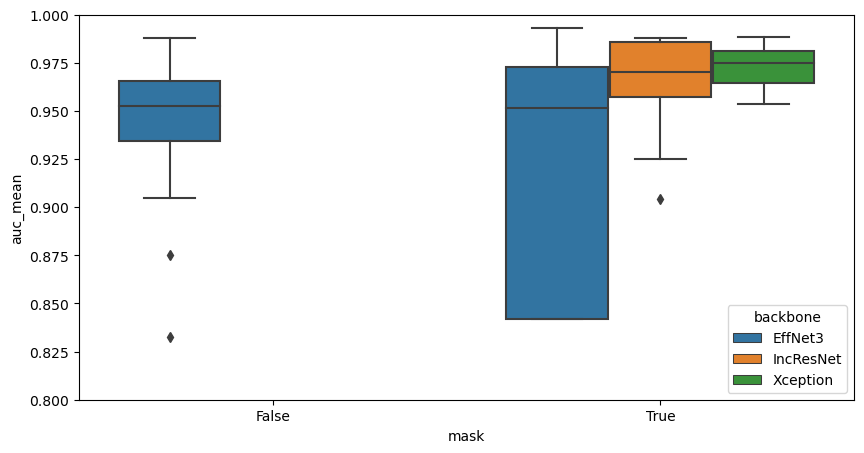

In [343]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="mask", y='auc_mean',
                hue = 'backbone',
                data=data)
p.set(ylim=(0.8, 1))

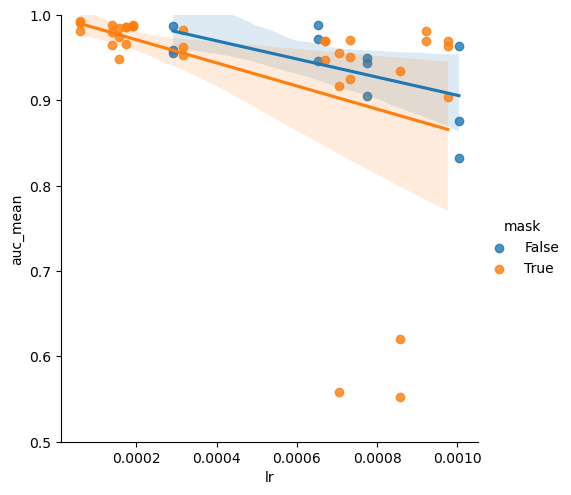

In [344]:
# plt.subplots(figsize=(10,5))
p = sns.lmplot(x="lr", y='auc_mean',
               hue= 'mask',
                data=data)
p.set(ylim=(0.5, 1))

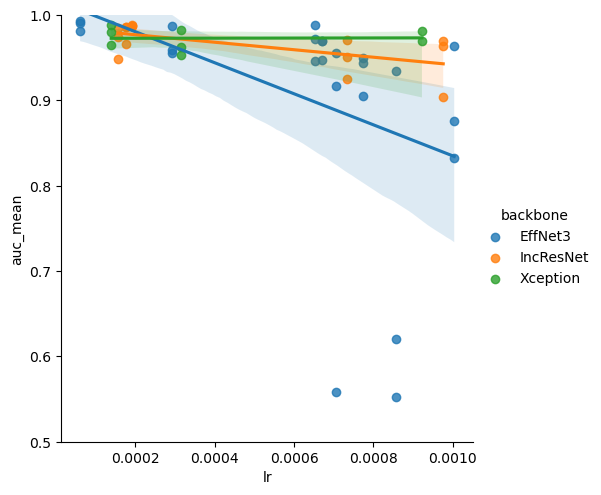

In [345]:
# plt.subplots(figsize=(10,5))
p = sns.lmplot(x="lr", y='auc_mean',
               hue= 'backbone',
                data=data)
p.set(ylim=(0.5, 1))

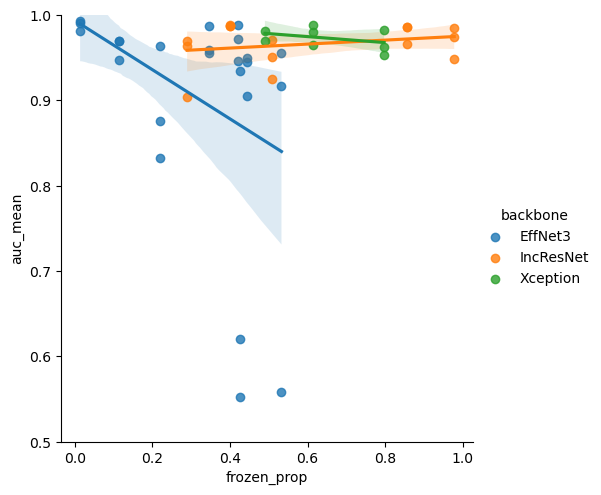

In [346]:
# plt.subplots(figsize=(10,5))
p = sns.lmplot(x="frozen_prop", y='auc_mean',
               hue= 'backbone',
                data=data)
p.set(ylim=(0.5, 1))

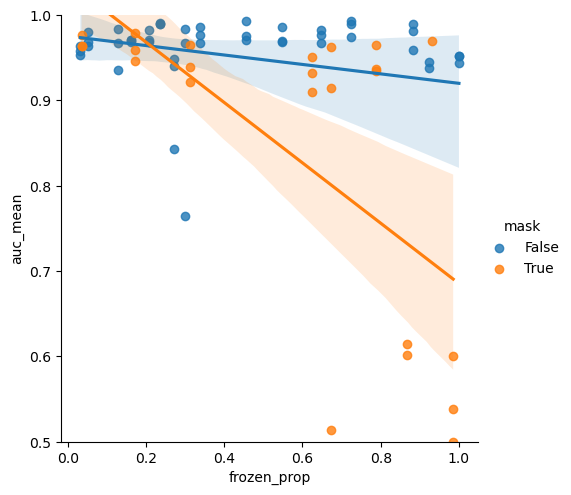

In [337]:
# plt.subplots(figsize=(10,5))
p = sns.lmplot(x="frozen_prop", y='auc_mean',
               hue= 'mask',
                data=data)
p.set(ylim=(0.5, 1))

# Comparaciones

In [271]:
import scipy.stats as st

In [272]:
print(st.shapiro(layer.auc_mean))
print(st.shapiro(no_layer.auc_mean))

ShapiroResult(statistic=0.5172263979911804, pvalue=3.250627544915119e-11)
ShapiroResult(statistic=0.5384728908538818, pvalue=1.0738510232942422e-13)


In [273]:
st.ttest_ind(layer.auc_mean, no_layer.auc_mean)

Ttest_indResult(statistic=0.9922636259686428, pvalue=0.3231166385805271)

In [274]:
st.ttest_ind(layer.f1_score_mean, no_layer.f1_score_mean)

Ttest_indResult(statistic=0.9048857388904599, pvalue=0.3673854740214344)

In [275]:
st.ttest_ind(layer.auc_mean[layer.backbone == 'Xception'], layer.auc_mean[layer.backbone == 'EffNet3'])

Ttest_indResult(statistic=1.4867507258441197, pvalue=0.14751599057425036)

In [276]:
st.ttest_ind(no_layer.auc_mean[no_layer.backbone == 'Xception'], no_layer.auc_mean[no_layer.backbone == 'EffNet3'])

Ttest_indResult(statistic=3.4878355407561865, pvalue=0.000935884405748948)